In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'air pollution dataset.csv'
df_new = pd.read_csv(file_path)

print("New dataset loaded successfully.")
print("\nDataset Info:")
df_new.info()

print("\nFirst 5 rows:")
df_new.head()

New dataset loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23463 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
 12  newCountry          23463 non-null  object
dtypes: int64(5), object(8)
memory usage: 2.3+ MB

First 5 rows:


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,newCountry
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,Russian Federation
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,Brazil
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,Italy
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,Poland
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,France


In [ ]:

print("Missing values per column:")
print(df_new.isnull().sum())

df_new.columns = df_new.columns.str.replace(' ', '_')

print("\nCleaned column names:")
print(df_new.columns)

Missing values per column:
Country               427
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
newCountry              0
dtype: int64

Cleaned column names:
Index(['Country', 'City', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value',
       'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category',
       'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value',
       'PM2.5_AQI_Category', 'newCountry'],
      dtype='object')


In [ ]:

features = ['AQI_Value', 'CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']
X = df_new[features]

y = df_new['AQI_Category']

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   AQI_Value  CO_AQI_Value  Ozone_AQI_Value  NO2_AQI_Value  PM2.5_AQI_Value
0         51             1               36              0               51
1         41             1                5              1               41
2         66             1               39              2               66
3         34             1               34              0               20
4         22             0               22              0                6

Target (y):
0    Moderate
1        Good
2    Moderate
3        Good
4        Good
Name: AQI_Category, dtype: object


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (18770, 5)
Testing set shape: (4693, 5)


In [ ]:

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)


print("Training the Random Forest model...")
model_rf.fit(X_train, y_train)
print("Model training complete.")

Training the Random Forest model...
Model training complete.


Model Accuracy: 100.00%

Classification Report:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1987
                     Hazardous       1.00      1.00      1.00        38
                      Moderate       1.00      1.00      1.00      1846
                     Unhealthy       1.00      1.00      1.00       446
Unhealthy for Sensitive Groups       1.00      1.00      1.00       318
                Very Unhealthy       1.00      1.00      1.00        58

                      accuracy                           1.00      4693
                     macro avg       1.00      1.00      1.00      4693
                  weighted avg       1.00      1.00      1.00      4693


Confusion Matrix:


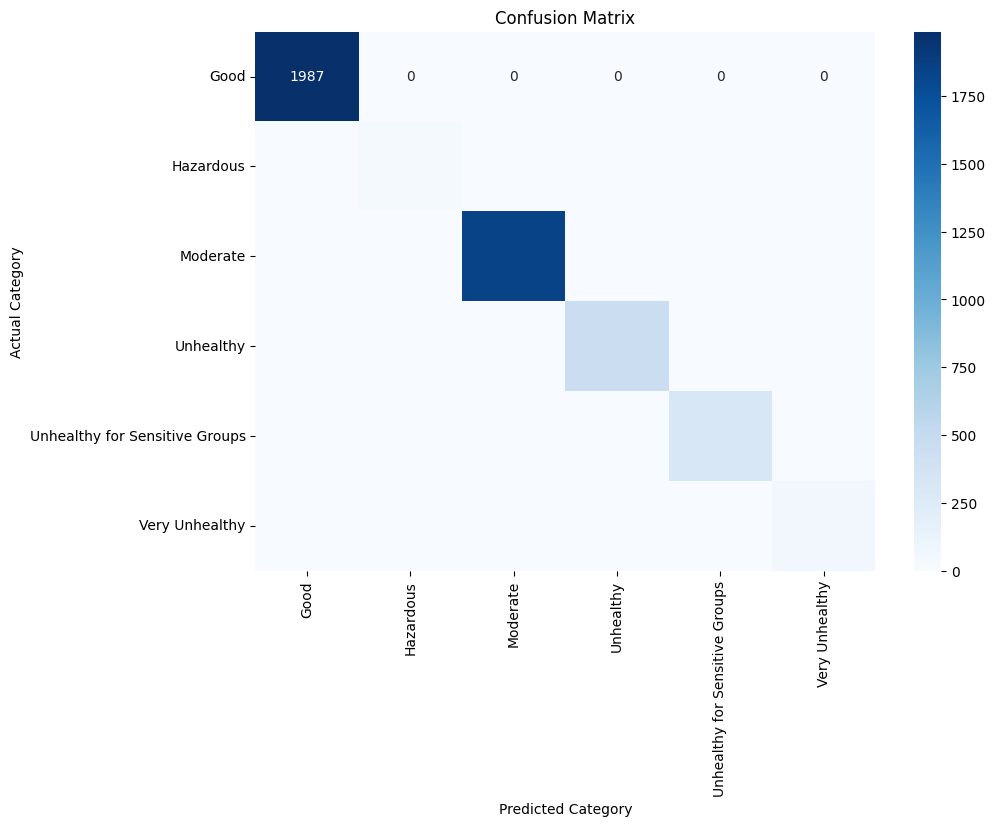

In [ ]:

y_pred = model_rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

class_labels = model_rf.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()

Feature Importances:
           feature  importance
0        AQI_Value    0.523843
4  PM2.5_AQI_Value    0.401383
1     CO_AQI_Value    0.038681
2  Ozone_AQI_Value    0.034467
3    NO2_AQI_Value    0.001626


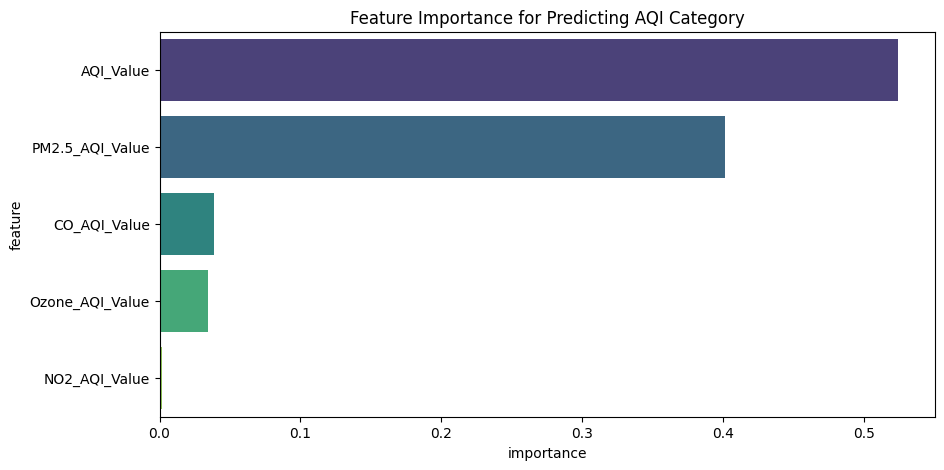

In [ ]:

importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting AQI Category')
plt.show()

In [ ]:

hypothetical_data = pd.DataFrame({
    'AQI_Value': [155],
    'CO_AQI_Value': [5],
    'Ozone_AQI_Value': [155],
    'NO2_AQI_Value': [12],
    'PM2.5_AQI_Value': [140]
})


hypothetical_data = hypothetical_data[features]

predicted_category = model_rf.predict(hypothetical_data)

print("--- Hypothetical Scenario ---")
print("Pollutant Values:")
print(hypothetical_data)
print(f"\nPredicted AQI Category: '{predicted_category[0]}'")

--- Hypothetical Scenario ---
Pollutant Values:
   AQI_Value  CO_AQI_Value  Ozone_AQI_Value  NO2_AQI_Value  PM2.5_AQI_Value
0        155             5              155             12              140

Predicted AQI Category: 'Unhealthy'


In [ ]:
print("--- Building a new model without the 'AQI_Value' feature ---")

new_features = ['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']
X_new = df_new[new_features]
y_new = df_new['AQI_Category']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42, stratify=y_new)

model_rf_new = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_new.fit(X_train_new, y_train_new)

y_pred_new = model_rf_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f"\nNew Model Accuracy (without AQI_Value): {accuracy_new * 100:.2f}%")

importances_new = model_rf_new.feature_importances_
feature_importance_df_new = pd.DataFrame({'feature': new_features, 'importance': importances_new})
feature_importance_df_new = feature_importance_df_new.sort_values(by='importance', ascending=False)

print("\nNew Feature Importances:")
print(feature_importance_df_new)

--- Building a new model without the 'AQI_Value' feature ---

New Model Accuracy (without AQI_Value): 99.89%

New Feature Importances:
           feature  importance
3  PM2.5_AQI_Value    0.836251
1  Ozone_AQI_Value    0.081643
0     CO_AQI_Value    0.073411
2    NO2_AQI_Value    0.008696


In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

print("Visualization libraries are ready.")

Visualization libraries are ready.


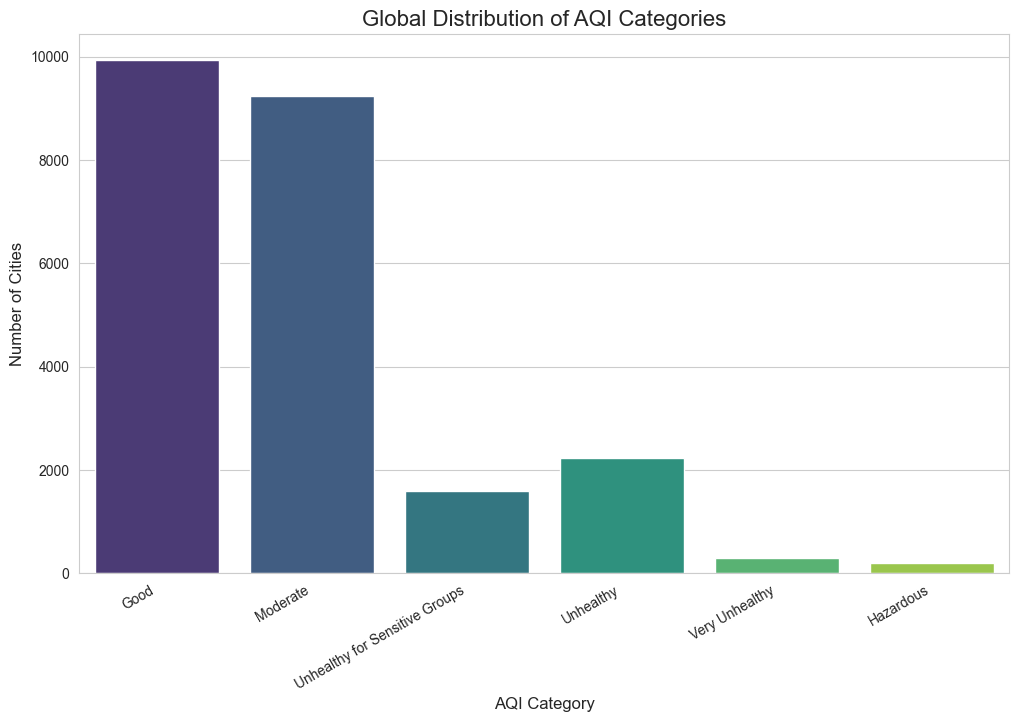

In [ ]:
category_order = [
    'Good',
    'Moderate',
    'Unhealthy for Sensitive Groups',
    'Unhealthy',
    'Very Unhealthy',
    'Hazardous'
]

sns.countplot(x='AQI_Category', data=df_new, order=category_order, palette='viridis')

plt.title('Global Distribution of AQI Categories', fontsize=16)
plt.xlabel('AQI Category', fontsize=12)
plt.ylabel('Number of Cities', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.show()

Top 10 Most Polluted Cities (by Average AQI):
City
Fazilka      500.0
Suratgarh    500.0
Dabwali      500.0
Phalauda     500.0
Tynda        500.0
Sisauli      500.0
Jodhpur      500.0
Moradabad    500.0
Padampur     500.0
Aonla        500.0
Name: AQI_Value, dtype: float64


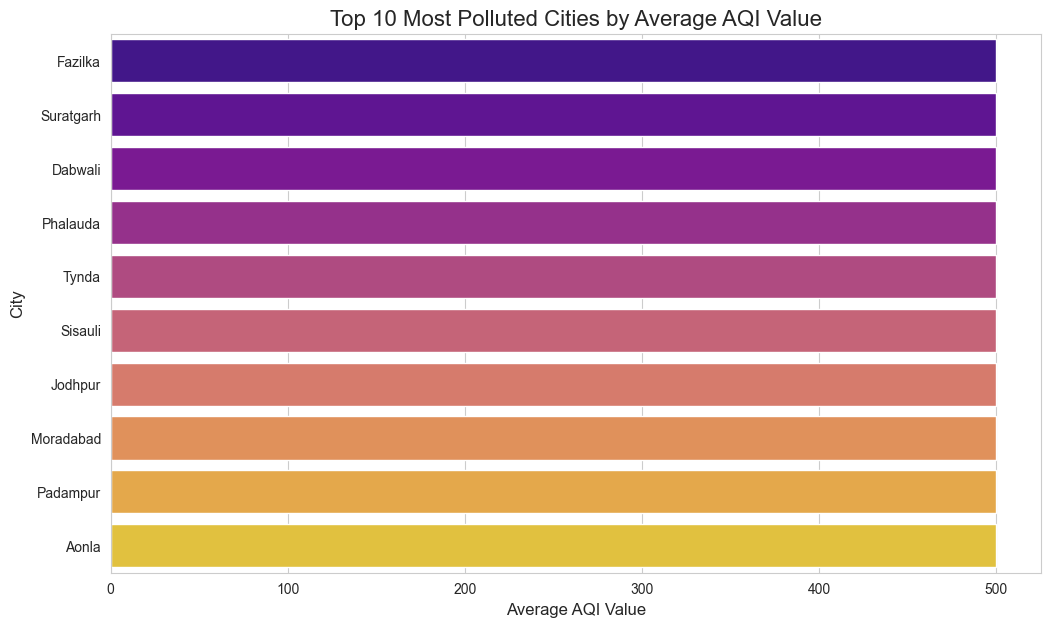

In [ ]:
top_10_polluted_cities = df_new.groupby('City')['AQI_Value'].mean().sort_values(ascending=False).head(10)

print("Top 10 Most Polluted Cities (by Average AQI):")
print(top_10_polluted_cities)

sns.barplot(x=top_10_polluted_cities.values, y=top_10_polluted_cities.index, palette='plasma')

plt.title('Top 10 Most Polluted Cities by Average AQI Value', fontsize=16)
plt.xlabel('Average AQI Value', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.show()

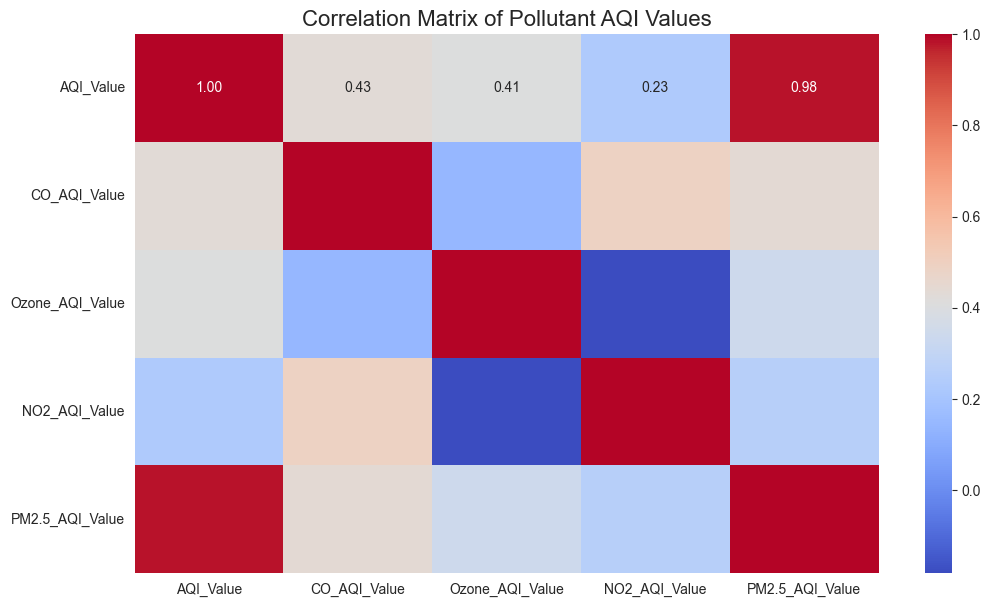

In [ ]:
numerical_cols = ['AQI_Value', 'CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']
correlation_matrix = df_new[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix of Pollutant AQI Values', fontsize=16)
plt.show()

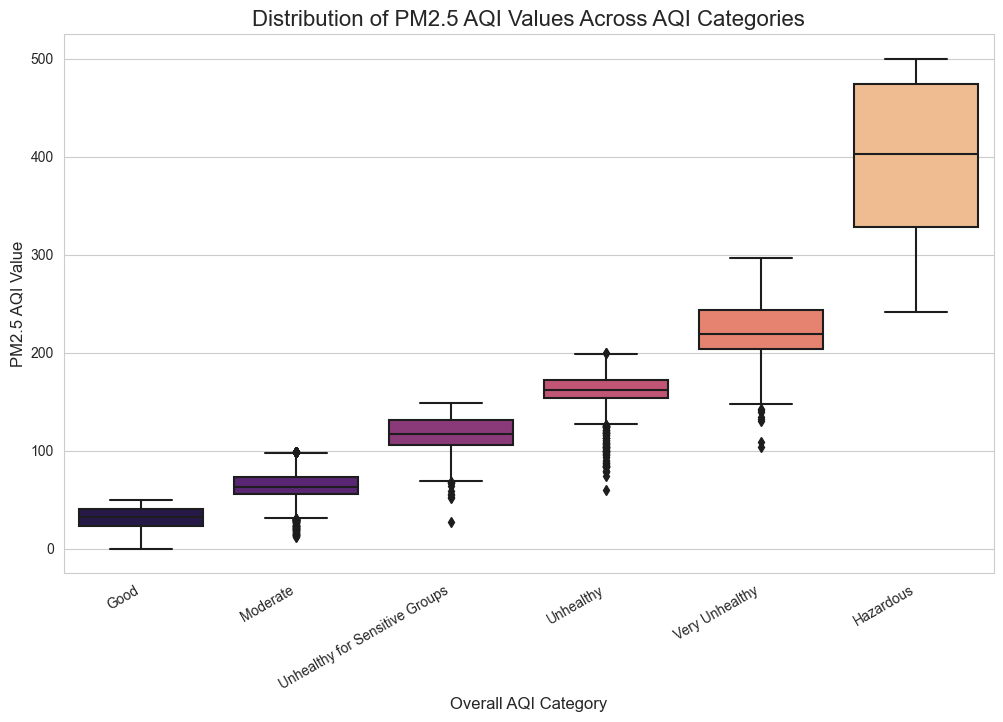

In [ ]:
sns.boxplot(x='AQI_Category', y='PM2.5_AQI_Value', data=df_new, order=category_order, palette='magma')

plt.title('Distribution of PM2.5 AQI Values Across AQI Categories', fontsize=16)
plt.xlabel('Overall AQI Category', fontsize=12)
plt.ylabel('PM2.5 AQI Value', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.show()

In [ ]:
import joblib

model_filename = 'aqi_category_classifier.joblib'
joblib.dump(model_rf_new, model_filename)

print(f"Final model successfully saved as '{model_filename}'")
print("This file should now be visible in your project folder.")

Final model successfully saved as 'aqi_category_classifier.joblib'
This file should now be visible in your project folder.
